# FinTime – Data Insights & Business Analysis
### Project: FinTime – Customer Financial Behavior & Health Intelligence System
### Author: Ujjwal Verma


## Objective
The objective of this notebook is to generate business insights from
pre-aggregated datasets derived using SQL.

This phase focuses on:
- Understanding revenue contribution across customer segments
- Identifying revenue trends over time
- Analyzing churn distribution
- Highlighting top revenue-generating locations

All insights generated here are later reflected in the Power BI dashboard
and final business reports.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Load Derived Analytical Datasets

The datasets used in this notebook are outputs from the SQL transformation
layer. These tables are already cleaned, aggregated, and structured
specifically for analysis and visualization.


In [ ]:
customer = pd.read_csv("../../2_Data/Derived_Tables/customer_summary.csv")
monthly = pd.read_csv("../../2_Data/Derived_Tables/monthly_summary.csv")
churn = pd.read_csv("../../2_Data/Derived_Tables/churn_table.csv")

## Customer Summary Dataset Overview

Initial inspection of the customer-level dataset helps validate:
- Data structure
- Feature availability
- Range of numerical attributes


In [3]:
customer.head()

,customerid,customerdob,custgender,custlocation,latestaccountbalance,totaltransactions,totalamountspent,avgtransactionvalue,firsttransactiondate,lasttransactiondate,segment
0,C7926970,Unknown,M,PUNE,74742.99,1,300.0,300.0,2016-10-21,2016-10-21,Standard
1,C1135963,Unknown,M,NELLORE,4383.72,1,200.0,200.0,2016-09-22,2016-09-22,Low Value
2,C5622817,Unknown,M,MOHALI,27919.83,1,50.0,50.0,2016-09-22,2016-09-22,Low Value
3,C6814414,Unknown,M,CHENNAI,27021.05,1,1700.0,1700.0,2016-09-27,2016-09-27,Premium
4,C3931338,Unknown,M,PUNIGAM,176500.60,1,200.0,200.0,2016-09-26,2016-09-26,Low Value


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803694 entries, 0 to 803693
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   customerid            803694 non-null  object 
 1   customerdob           803694 non-null  object 
 2   custgender            803694 non-null  object 
 3   custlocation          803694 non-null  object 
 4   latestaccountbalance  803694 non-null  float64
 5   totaltransactions     803694 non-null  int64  
 6   totalamountspent      803694 non-null  float64
 7   avgtransactionvalue   803694 non-null  float64
 8   firsttransactiondate  803694 non-null  object 
 9   lasttransactiondate   803694 non-null  object 
 10  segment               803694 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 67.4+ MB


In [5]:
customer.describe()

,latestaccountbalance,totaltransactions,totalamountspent,avgtransactionvalue
count,8.036940e+05,803694.000000,803694.000000,803694.000000
mean,1.079234e+05,1.165161,699.743087,600.633736
std,7.036680e+05,0.423111,723.615428,603.308404
min,0.000000e+00,1.000000,0.000000,0.000000
25%,5.323970e+03,1.000000,170.000000,153.000000
50%,1.791432e+04,1.000000,445.000000,388.000000
75%,5.910731e+04,1.000000,1000.000000,875.150024
max,1.150355e+08,6.000000,7450.840000,2758.389893


## Revenue Contribution by Customer Segment

This analysis evaluates how total revenue is distributed across
different customer value segments, helping identify revenue concentration
and high-impact customer groups.


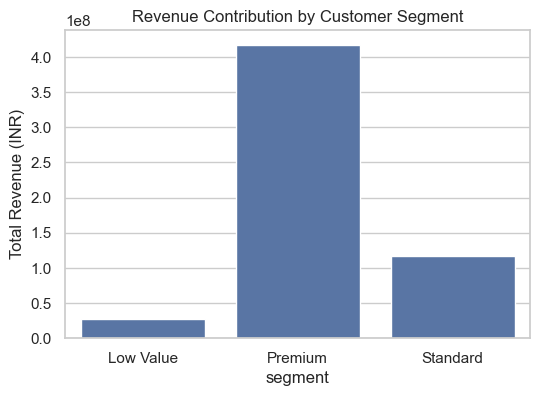

In [6]:
segment_revenue = customer.groupby('segment')['totalamountspent'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=segment_revenue, x='segment', y='totalamountspent')
plt.title("Revenue Contribution by Customer Segment")
plt.ylabel("Total Revenue (INR)")
plt.show()

## Monthly Revenue Trend Analysis

This visualization highlights how total revenue changes over time,
helping identify growth patterns, seasonality, or fluctuations
in customer spending.


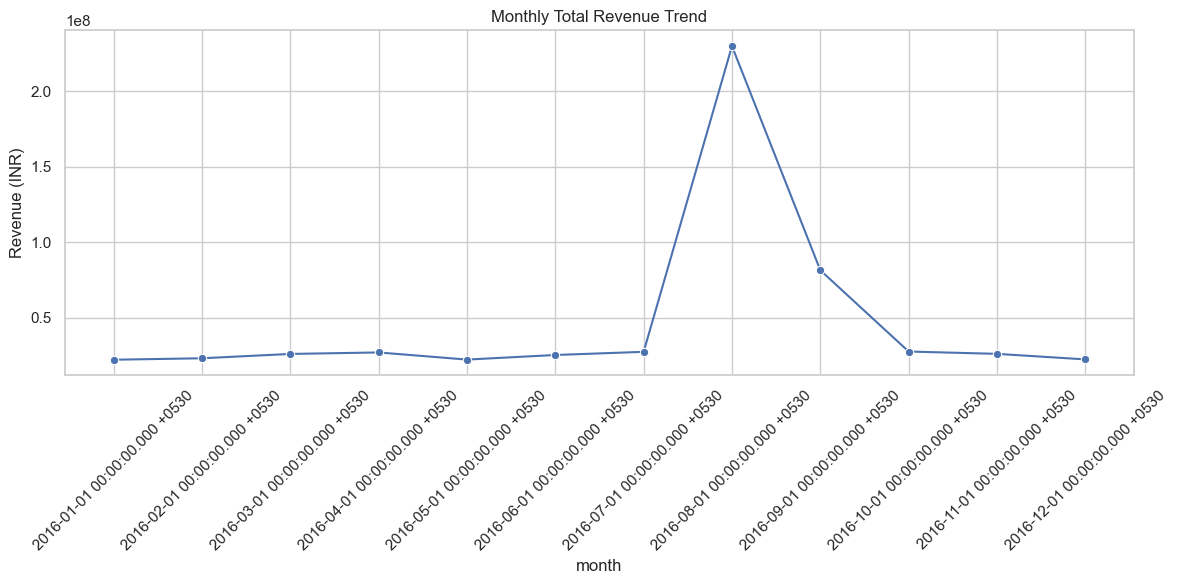

In [7]:

monthly_trend = monthly.groupby('month')['monthlyspend'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_trend, x='month', y='monthlyspend', marker="o")
plt.title("Monthly Total Revenue Trend")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top Revenue-Generating Locations

This analysis identifies the geographic locations contributing
the highest total revenue, supporting regional performance evaluation.


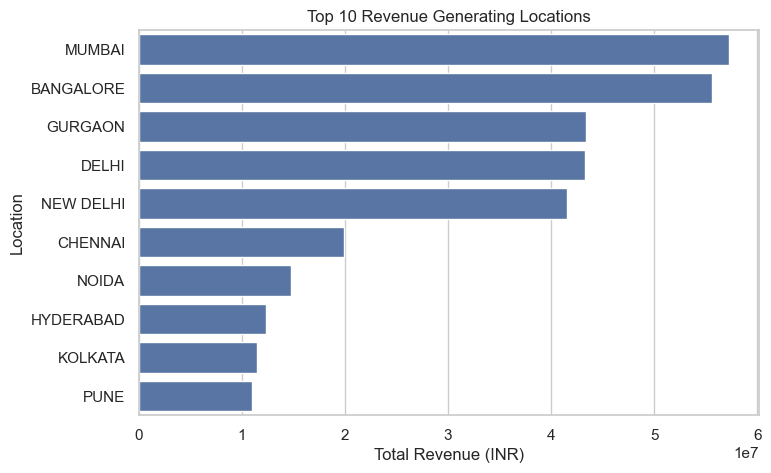

In [8]:
top_locations = customer.groupby('custlocation')['totalamountspent'].sum().nlargest(10).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=top_locations, x='totalamountspent', y='custlocation')
plt.title("Top 10 Revenue Generating Locations")
plt.xlabel("Total Revenue (INR)")
plt.ylabel("Location")
plt.show()

## Key Insights Summary

- Revenue contribution varies significantly across customer segments,
  with higher-value segments contributing a disproportionate share.
- Monthly revenue trends indicate noticeable variation over time,
  suggesting potential seasonality in customer spending.
- A clear split exists between active and churned customers,
  highlighting the importance of retention strategies.
- Revenue is concentrated in a limited number of geographic locations,
  which can guide region-focused business initiatives.

These insights form the analytical foundation for dashboard design
and business recommendations.
